In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel(r"C:/Users/THARUNBALAAJE/Downloads/Datasets/Predictive Analysis.xlsx")

In [3]:
print(df.head(5))

   Emp_ID Emp_Name  Experience (Years)  Salary (in ₹)  Performance_Score  \
0       1    Rahul                   1         300000                 55   
1       2    Sneha                   3         450000                 60   
2       3    Arjun                   5         600000                 80   
3       4    Divya                   7         720000                 85   
4       5   Vikram                   9         850000                 90   

  Promotion_Eligible  
0                 No  
1                 No  
2                Yes  
3                Yes  
4                Yes  


In [4]:
from sklearn.linear_model import LinearRegression


In [ ]:
x = df[['Experience (Years)']]   
y = df['Salary (in ₹)']
print(x)
print(y)

   Experience (Years)
0                   1
1                   3
2                   5
3                   7
4                   9
5                   2
6                   4
7                   6
8                   8
9                  10
0    300000
1    450000
2    600000
3    720000
4    850000
5    380000
6    520000
7    680000
8    800000
9    950000
Name: Salary (in ₹), dtype: int64


[309454.54545455 449696.96969697 589939.39393939 730181.81818182
 870424.24242424 379575.75757576 519818.18181818 660060.60606061
 800303.03030303 940545.45454545]


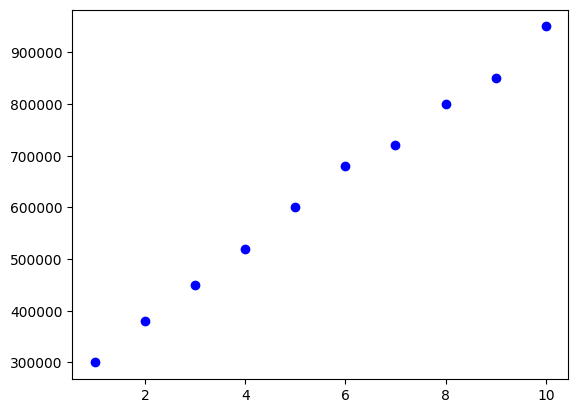

In [12]:
model = LinearRegression()
model.fit(x, y)

predicted_salary = model.predict(x)
print(predicted_salary)
plt.scatter(x, y, color='blue')

In [16]:
correlation = np.corrcoef(x.values.ravel(), y)[0, 1]
print("Correlation", correlation)

Correlation 0.998525657806943


In [17]:
experience = 5
score = 80

# Predict salary using the trained model for 5 years of experience
predicted_salary_5yrs = model.predict(np.array([[experience]]))[0]
print(f"Predicted salary for 5 years of experience and score 80: ₹{predicted_salary_5yrs:.2f}")

Predicted salary for 5 years of experience and score 80: ₹589939.39


c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Prepare X and y
X = df[['Experience (Years)', 'Performance_Score']]   # Two features
y = df['Salary (in ₹)']                  # Target variable

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict salary for 5 years experience and score 80
new_data = np.array([[8, 88]])
predicted_salary = model.predict(new_data)

print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 801072.4249525724


c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Compare predicted salary with actual salary for the multi-feature model
comparison_df = pd.DataFrame({
    'Actual Salary': y,
    'Predicted Salary': model.predict(X)
})
print(comparison_df)

   Actual Salary  Predicted Salary
0         300000     308704.385671
1         450000     444695.904475
2         600000     596556.187925
3         720000     732547.706729
4         850000     868539.225533
5         380000     377229.103895
6         520000     520626.046200
7         680000     664022.988506
8         800000     801072.424953
9         950000     936006.026113


In [24]:
# Calculate R^2 score (coefficient of determination) for the model
r2_score = model.score(X, y)
print(f"Model R^2 score: {r2_score:.4f}")

Model R^2 score: 0.9974


In [25]:
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [65350.96529405  1057.91764312]
Model intercept: 185167.95000557922


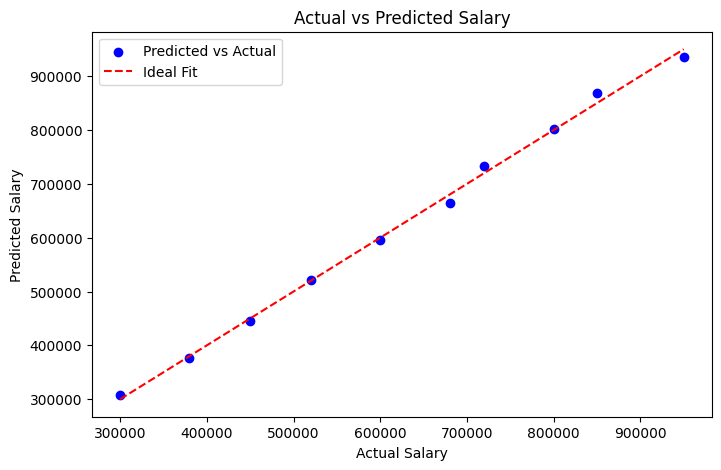

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(comparison_df['Actual Salary'], comparison_df['Predicted Salary'], color='blue', label='Predicted vs Actual')
plt.plot([comparison_df['Actual Salary'].min(), comparison_df['Actual Salary'].max()],
         [comparison_df['Actual Salary'].min(), comparison_df['Actual Salary'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

In [27]:
# Predict salary for the worst performer (lowest Performance_Score) with 9 years of experience
min_score = X['Performance_Score'].min()
input_data = np.array([[9, min_score]])
predicted_worst_salary = model.predict(input_data)[0]
print(f"Predicted salary for worst performer with 9 years of experience (score {min_score}): ₹{predicted_worst_salary:.2f}")

Predicted salary for worst performer with 9 years of experience (score 55): ₹831512.11


c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
# Predict salary for a new intern with 0.5 years experience and score 50
intern_data = np.array([[0.5, 50]])
predicted_intern_salary = model.predict(intern_data)[0]
print(f"Predicted salary for new intern (0.5 years experience, score 50): ₹{predicted_intern_salary:.2f}")

Predicted salary for new intern (0.5 years experience, score 50): ₹270739.31


c:\Program Files\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# Calculate the increase in salary for a 10-point increase in Performance_Score
performance_coef = model.coef_[1]  # Coefficient for Performance_Score
salary_increase = performance_coef * 10
print(f"Salary will increase by ₹{salary_increase:.2f} for a 10-point increase in Performance_Score.")

Salary will increase by ₹10579.18 for a 10-point increase in Performance_Score.


In [30]:
# The impact of a one-year increase in experience on salary is given by the coefficient for 'Experience (Years)'
experience_coef = model.coef_[0]  # Coefficient for 'Experience (Years)'
print(f"Salary will increase by ₹{experience_coef:.2f} for each additional year of experience.")

Salary will increase by ₹65350.97 for each additional year of experience.
